<a href="https://colab.research.google.com/github/Lusiferwijekoon/AssignmentLocationANdroid/blob/master/DefectPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
#importing data libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

%matplotlib inline

In [241]:
#load the data
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("dataset_defect.csv")

#Print the first 5 rows
df.head()

Saving dataset_defect.csv to dataset_defect (7).csv


,TEST NO,AXLE NUMBER,TEST CODE FOR EACH TEST,NATURAL FREQUENCY - 1ST,NATURAL FREQUENCY - 2ND,NATURAL FREQUENCY - 3RD,FAILURE
0,1,AXLE 1,AX1_1,9393.00,8394.90,5789.70,NO
1,2,AXLE 1,AX1_2,9290.20,8501.80,5745.30,NO
2,3,AXLE 1,AX1_3,9472.10,8330.40,5857.80,NO
3,4,AXLE 1,AX1_4,9315.70,8410.60,5895.60,NO
4,5,AXLE 1,AX1_5,9448.30,8267.50,5738.10,NO


In [242]:
# Exploratary data analysisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TEST NO                  250 non-null    int64  
 1   AXLE NUMBER              250 non-null    object 
 2   TEST CODE FOR EACH TEST  250 non-null    object 
 3   NATURAL FREQUENCY - 1ST  250 non-null    float64
 4   NATURAL FREQUENCY - 2ND  250 non-null    float64
 5   NATURAL FREQUENCY - 3RD  250 non-null    float64
 6   FAILURE                  250 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.8+ KB


In [243]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  250
Number of columns in the dataset:  7


In [244]:
#Main Informations about the data set
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,TEST NO,NATURAL FREQUENCY - 1ST,NATURAL FREQUENCY - 2ND,NATURAL FREQUENCY - 3RD
count,250.00,250.00,250.00,250.00
mean,125.50,5840.08,5236.45,5497.67
std,72.31,2882.57,2306.42,6519.72
min,1.00,1750.20,890.40,115.80
25%,63.25,2902.38,3712.30,2301.95
50%,125.50,5088.85,5077.30,4959.25
75%,187.75,8937.90,7282.45,6022.03
max,250.00,10246.10,9648.70,42148.60


In [245]:
df.isnull().sum()

TEST NO                    0
AXLE NUMBER                0
TEST CODE FOR EACH TEST    0
NATURAL FREQUENCY - 1ST    0
NATURAL FREQUENCY - 2ND    0
NATURAL FREQUENCY - 3RD    0
FAILURE                    0
dtype: int64

In [246]:
#final results count
df.FAILURE.value_counts()

FAILURE
YES    181
NO      69
Name: count, dtype: int64

<Axes: xlabel='FAILURE'>

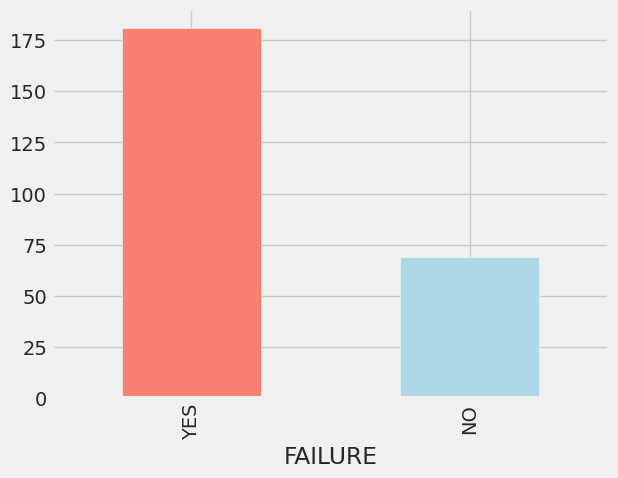

In [247]:
df.FAILURE.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [248]:
# Remove identifier columns
df.drop(columns=['TEST NO', 'AXLE NUMBER', 'TEST CODE FOR EACH TEST'], inplace=True)
#Pre processing the data make the resuts as numeric values
covid_map = {'YES': 1, 'NO': 0}
df['FAILURE'] = df['FAILURE'].map(covid_map)
df.head(5)


,NATURAL FREQUENCY - 1ST,NATURAL FREQUENCY - 2ND,NATURAL FREQUENCY - 3RD,FAILURE
0,9393.00,8394.90,5789.70,0
1,9290.20,8501.80,5745.30,0
2,9472.10,8330.40,5857.80,0
3,9315.70,8410.60,5895.60,0
4,9448.30,8267.50,5738.10,0


In [249]:
train_duplicates = df.duplicated().sum()
print(f"Duplicate Records: {train_duplicates}")
df=df.drop_duplicates()
train_duplicates1 = df.duplicated().sum()
print(f"Duplicate Records: {train_duplicates1}")
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Duplicate Records: 48
Duplicate Records: 0
Number of rows in the dataset:  202
Number of columns in the dataset:  4


In [250]:
#get the categorical values
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

NATURAL FREQUENCY - 1ST : [ 9393.   9290.2  9472.1  9315.7  9448.3  8937.9  8801.4  9065.8  8984.3
  8873.6  9017.2  8904.5  9142.8  8956.9  9110.3  9471.6  9336.2  9601.5
  9384.7  9567.9 10053.1  9923.5 10187.2  9984.6 10024.9  9534.4  9389.3
  9681.8  9468.4  9592.1  9649.5  9508.2  9772.4  9604.3  9696.8 10108.8
  9968.6 10246.1  9993.4 10123.7  9281.1  9153.9  9402.4  9276.1  9333.7
  9513.2  9372.6  9647.9  9441.5  9583.2  8236.7  8125.4  8387.9  8294.1
  8201.6  7937.9  7810.6  8094.5  7983.2  7896.1  8017.5  7885.4  8168.3
  8079.7  7942.1  7370.8  7245.3  7519.6  7412.1  7315.9  6789.2  6648.4
  6912.6  6796.1  6697.8  7452.1  7326.4  7584.3  7471.5  7389.7  5007.6
  4860.5  5149.3  4965.8  5052.1  5246.8  5098.3  5381.4  5220.7  5304.1
  5103.8  4952.7  5245.3  5080.2  5175.9  5186.2  5330.7  5075.9  5243.3
  5150.4  5056.8  4911.2  5200.4  5074.9  5001.6  4984.5  4836.9  5120.7
  5002.3  4889.4  4951.   4802.3  5097.5  4990.8  4876.2  5009.8  4859.6
  5154.3  5016.4  4903.5 

In [251]:
#print the categorical values and continues Values
print('Categorical Values: ',categorical_val)
print('Continuaes Values',continous_val)

Categorical Values:  ['FAILURE']
Continuaes Values ['NATURAL FREQUENCY - 1ST', 'NATURAL FREQUENCY - 2ND', 'NATURAL FREQUENCY - 3RD']


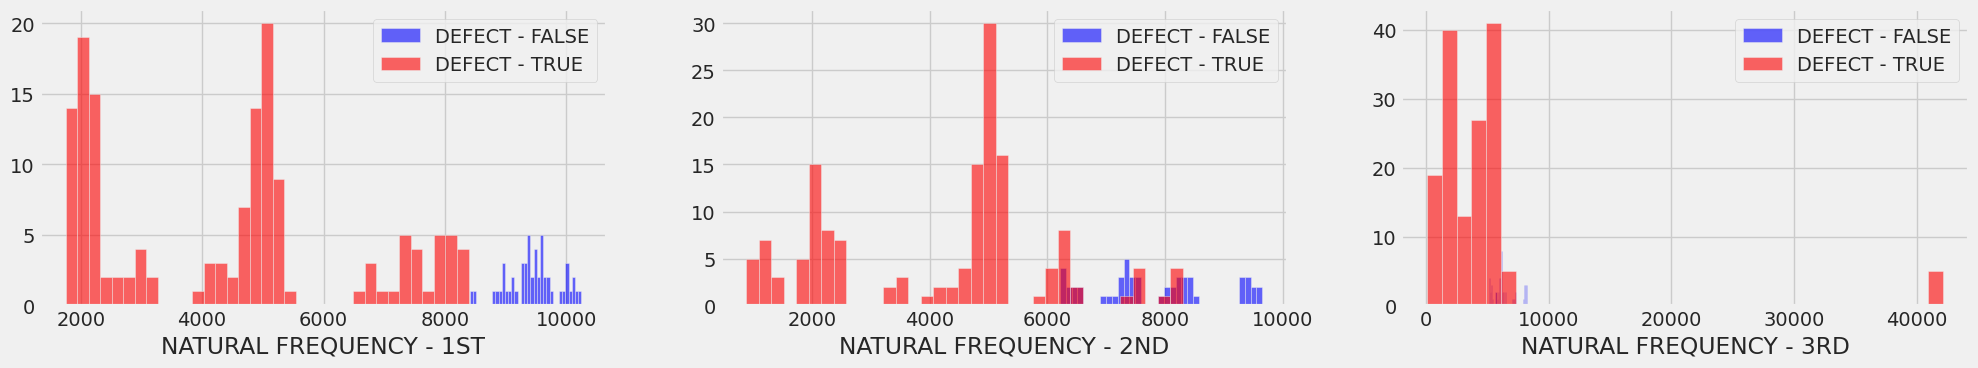

In [252]:
#Visualize the data
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val, 1):
    plt.subplot(7, 4, i)
    df[df["FAILURE"] == 0][column].hist(bins=35, color='blue', label='DEFECT - FALSE', alpha=0.6)
    df[df["FAILURE"] == 1][column].hist(bins=35, color='red', label='DEFECT - TRUE', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

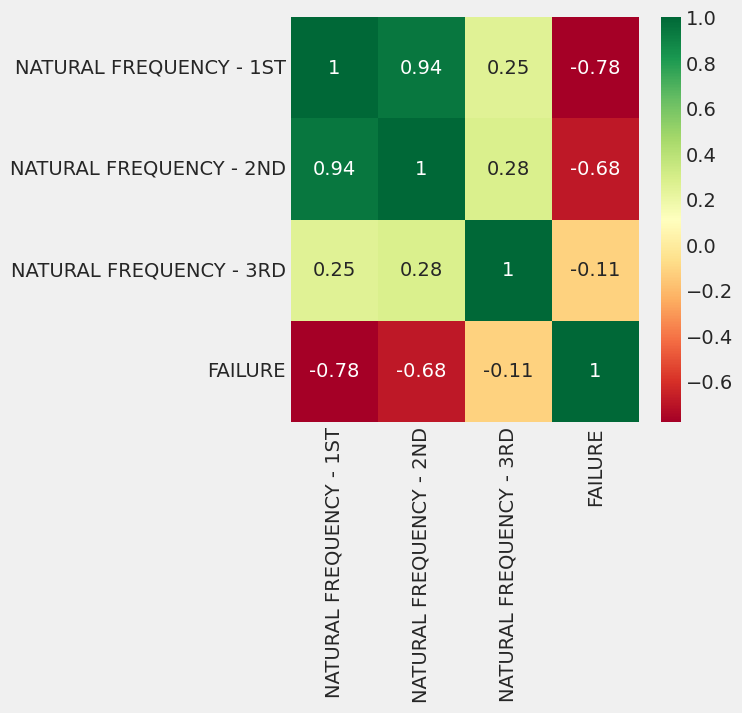

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: title={'center': 'Correlation with Positivity'}>

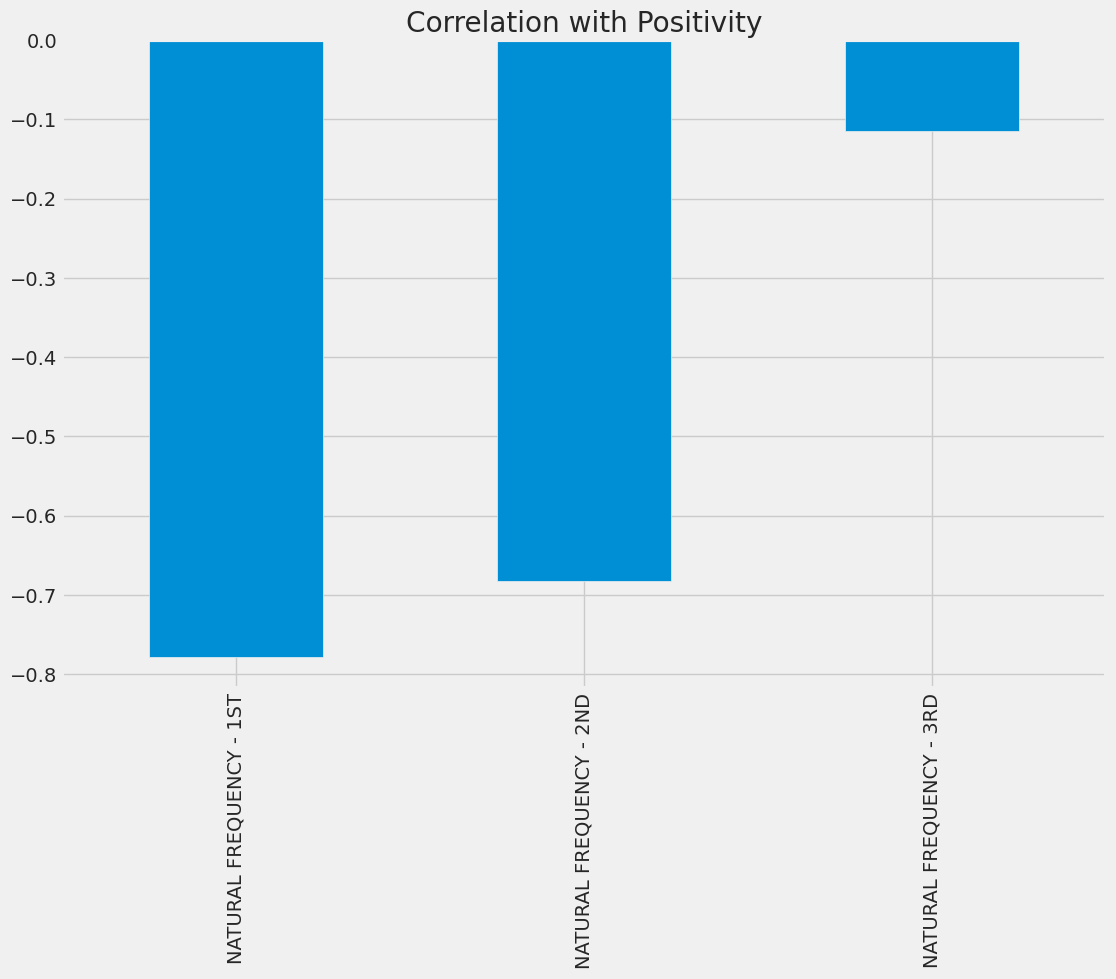

In [254]:
df.drop('FAILURE', axis=1).corrwith(df.FAILURE).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with Positivity")

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [256]:
from sklearn.model_selection import train_test_split

X = df.drop('FAILURE', axis=1)
y = df.FAILURE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
#4 apply the algorithms
# 1. Logistic Regressions
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

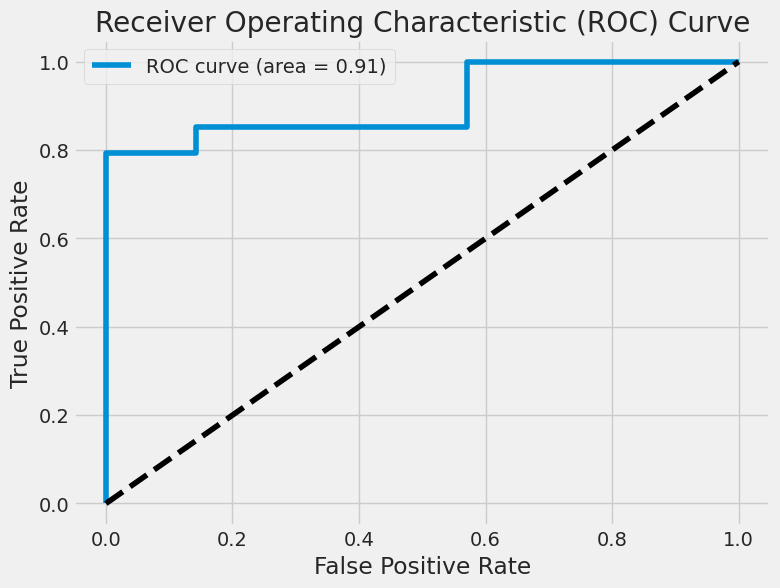

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [259]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.03%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 93.10%
			F1 score: 96.43%
_______________________________________________
Confusion Matrix: 
 [[ 45   0]
 [  8 108]]

Test Result:
Accuracy Score: 80.49%
_______________________________________________
Classification Report:	Precision Score: 96.43%
			Recall Score: 79.41%
			F1 score: 87.10%
_______________________________________________
Confusion Matrix: 
 [[ 6  1]
 [ 7 27]]



In [260]:
pred = log_reg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix

array([[ 6,  1],
       [ 7, 27]])

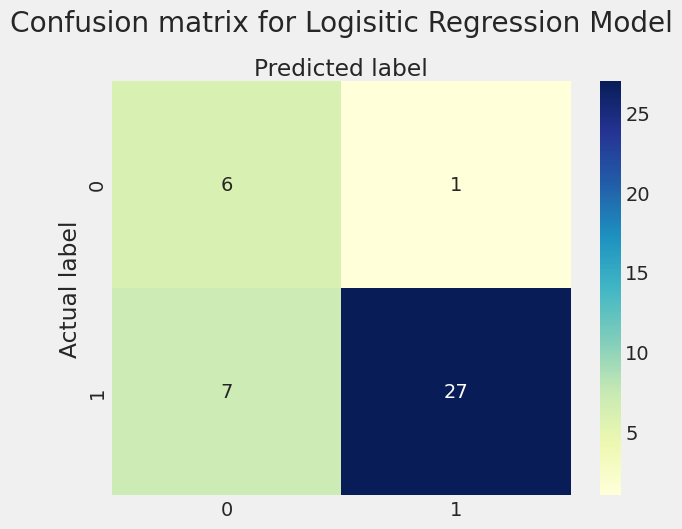

In [261]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [262]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Accuracy in TESTING
# Calculate and print the accuracy score
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test, pred), 5) * 100, '%')

# Calculate and print the precision score
precision = precision_score(y_test, pred)
print('Precision Score: ', precision)
print('Using Logistic Regression we get a precision score of: ',
      round(precision, 5) * 100, '%')

# Calculate and print the recall score
recall = recall_score(y_test, pred)
print('Recall Score: ', recall)
print('Using Logistic Regression we get a recall score of: ',
      round(recall, 5) * 100, '%')

# Calculate and print the F1 score
f1 = f1_score(y_test, pred)
print('F1 Score: ', f1)
print('Using Logistic Regression we get an F1 score of: ',
      round(f1, 5) * 100, '%')


Accuracy Score:  0.8048780487804879
Using Logistic Regression we get an accuracy score of:  80.488 %
Precision Score:  0.9642857142857143
Using Logistic Regression we get a precision score of:  96.429 %
Recall Score:  0.7941176470588235
Using Logistic Regression we get a recall score of:  79.412 %
F1 Score:  0.8709677419354839
Using Logistic Regression we get an F1 score of:  87.09700000000001 %


In [263]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score, precision, recall, f1]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Precision Score (Testing)', 'Recall Score','F1 Score'])
results_df

,Model,Training Accuracy %,Testing Accuracy %,Precision Score (Testing),Recall Score,F1 Score
0,Logistic Regression,95.03,80.49,0.96,0.79,0.87


In [264]:
#4 apply the algorithms
# 2. K-nearest
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.38%
_______________________________________________
Classification Report:	Precision Score: 99.15%
			Recall Score: 100.00%
			F1 score: 99.57%
_______________________________________________
Confusion Matrix: 
 [[ 44   1]
 [  0 116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 7  0]
 [ 0 34]]



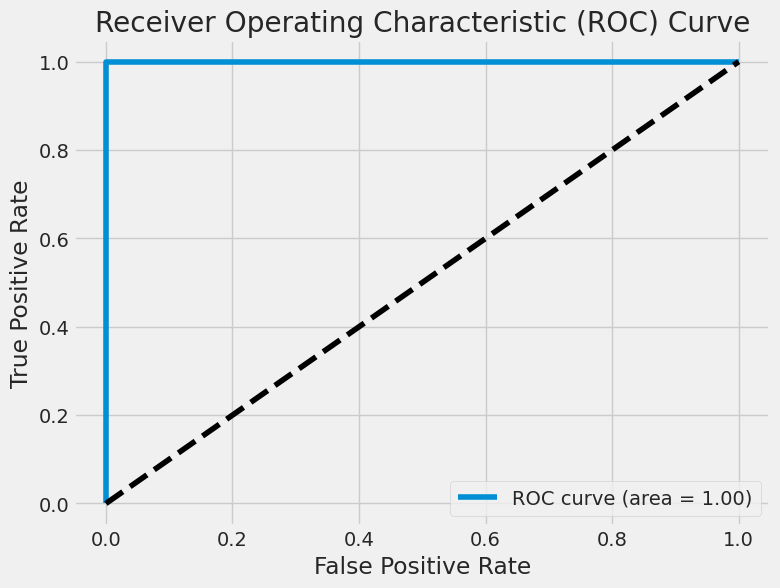

In [265]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [266]:
pred = knn_classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix

array([[ 7,  0],
       [ 0, 34]])

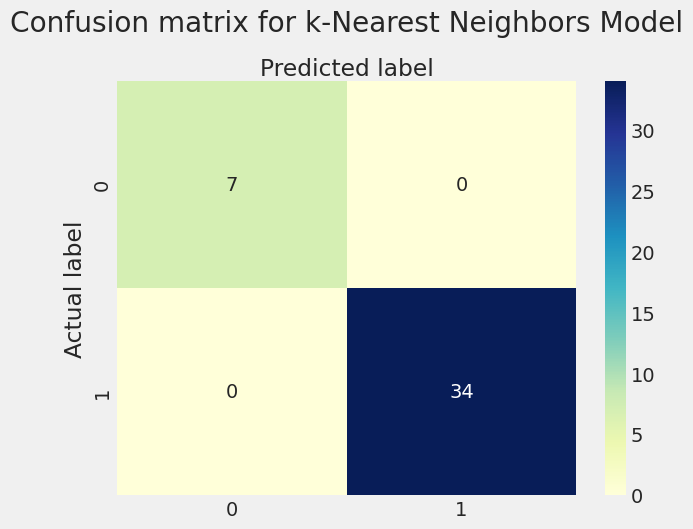

In [267]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [268]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Accuracy in TESTING
# Calculate and print the accuracy score
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Using K-nearest neighbors we get an accuracy score of: ',
      round(accuracy_score(y_test, pred), 5) * 100, '%')

# Calculate and print the precision score
precision_1 = precision_score(y_test, pred)
print('Precision Score: ', precision_1)
print('Using K-nearest neighbors we get a precision score of: ',
      round(precision_1, 5) * 100, '%')

# Calculate and print the recall score
recall_1 = recall_score(y_test, pred)
print('Recall Score: ', recall_1)
print('Using K-nearest neighbors we get a recall score of: ',
      round(recall_1, 5) * 100, '%')

# Calculate and print the F1 score
f1_1 = f1_score(y_test, pred)
print('F1 Score: ', f1_1)
print('Using K-nearest neighbors we get an F1 score of: ',
      round(f1_1, 5) * 100, '%')


Accuracy Score:  1.0
Using K-nearest neighbors we get an accuracy score of:  100.0 %
Precision Score:  1.0
Using K-nearest neighbors we get a precision score of:  100.0 %
Recall Score:  1.0
Using K-nearest neighbors we get a recall score of:  100.0 %
F1 Score:  1.0
Using K-nearest neighbors we get an F1 score of:  100.0 %


In [269]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score, precision_1, recall_1, f1_1]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Precision Score (Testing)', 'Recall Score','F1 Score'])
results_df_2
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Precision Score (Testing),Recall Score,F1 Score
0,Logistic Regression,95.03,80.49,0.96,0.79,0.87
1,K-nearest neighbors,99.38,100.00,1.00,1.00,1.00


In [270]:
#4 apply the algorithms
# 3. Decision Tree Classifier

In [271]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 45   0]
 [  0 116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 7  0]
 [ 0 34]]



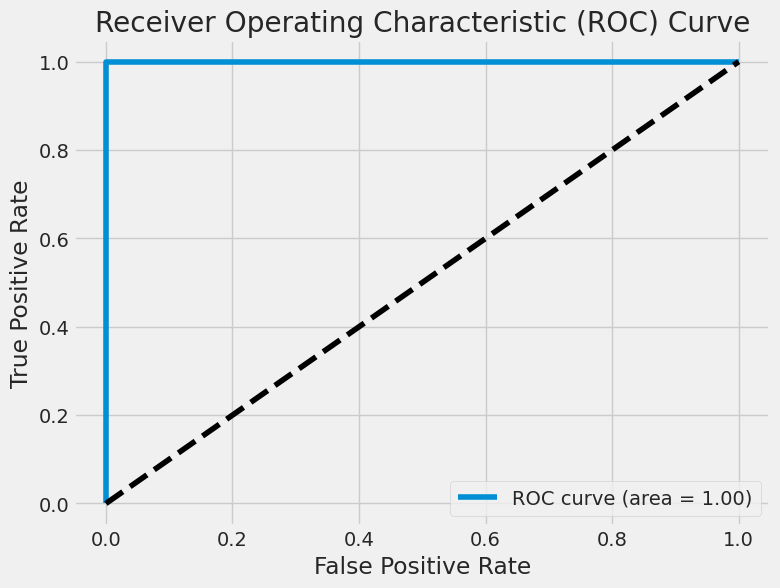

In [272]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [273]:
pred = tree.predict(X_test)
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix

array([[ 7,  0],
       [ 0, 34]])

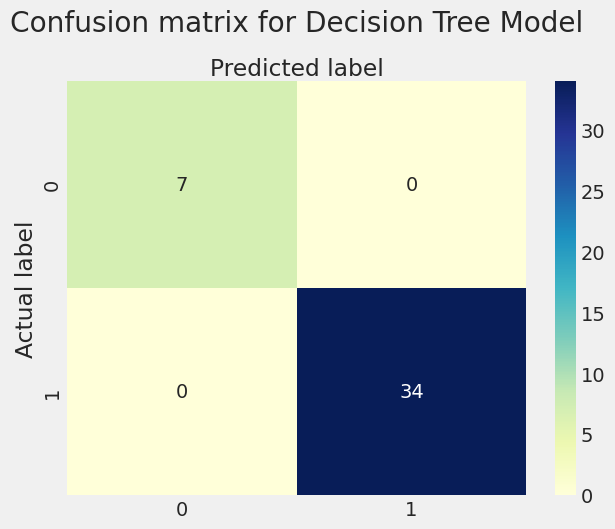

In [274]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [275]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Accuracy in TESTING
# Calculate and print the accuracy score
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Using Decision Tree Classifier we get an accuracy score of: ',
      round(accuracy_score(y_test, pred), 5) * 100, '%')

# Calculate and print the precision score
precision_2 = precision_score(y_test, pred)
print('Precision Score: ', precision_2)
print('Using Decision Tree Classifier we get a precision score of: ',
      round(precision_2, 5) * 100, '%')

# Calculate and print the recall score
recall_2 = recall_score(y_test, pred)
print('Recall Score: ', recall_2)
print('Using Decision Tree Classifier we get a recall score of: ',
      round(recall_2, 5) * 100, '%')

# Calculate and print the F1 score
f1_2 = f1_score(y_test, pred)
print('F1 Score: ', f1_2)
print('Using Decision Tree Classifier we get an F1 score of: ',
      round(f1_2, 5) * 100, '%')


Accuracy Score:  1.0
Using Decision Tree Classifier we get an accuracy score of:  100.0 %
Precision Score:  1.0
Using Decision Tree Classifier we get a precision score of:  100.0 %
Recall Score:  1.0
Using Decision Tree Classifier we get a recall score of:  100.0 %
F1 Score:  1.0
Using Decision Tree Classifier we get an F1 score of:  100.0 %


In [276]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score, precision_1, recall_1, f1_1]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Precision Score (Testing)', 'Recall Score','F1 Score'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Precision Score (Testing),Recall Score,F1 Score
0,Logistic Regression,95.03,80.49,0.96,0.79,0.87
1,K-nearest neighbors,99.38,100.00,1.00,1.00,1.00
2,Decision Tree Classifier,100.00,100.00,1.00,1.00,1.00


In [277]:
#4 apply the algorithms
# 4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 45   0]
 [  0 116]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[ 7  0]
 [ 0 34]]



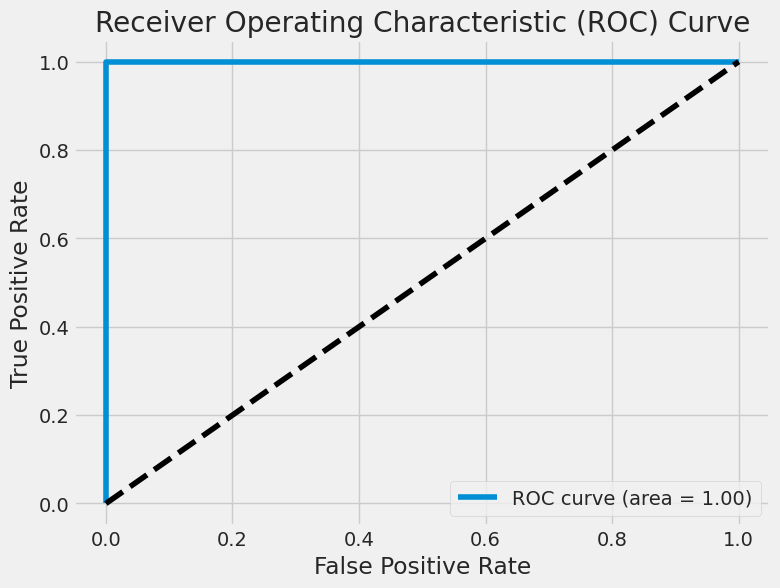

In [278]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = rand_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [279]:
pred = rand_forest.predict(X_test)
cnf_matrix = confusion_matrix(y_test,pred)
cnf_matrix

array([[ 7,  0],
       [ 0, 34]])

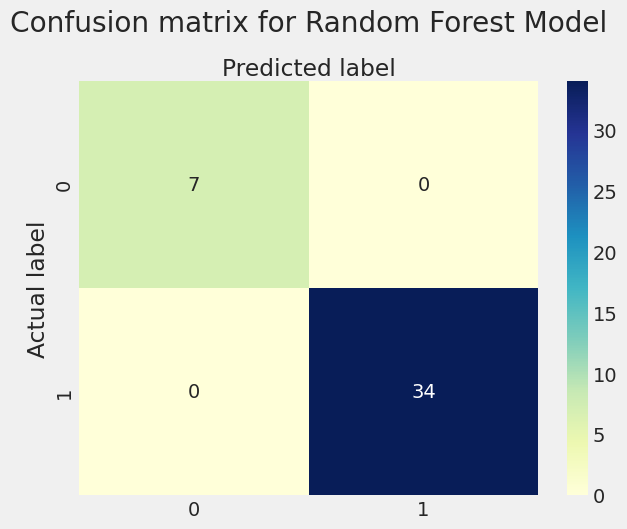

In [280]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [281]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Accuracy in TESTING
# Calculate and print the accuracy score
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Using Random Forest Classifier we get an accuracy score of: ',
      round(accuracy_score(y_test, pred), 5) * 100, '%')

# Calculate and print the precision score
precision_4 = round(precision_score(y_test, pred),2)
print('Precision Score: ', precision_4)
print('Using Random Forest Classifier we get a precision score of: ',
      round(precision_4, 5) * 100, '%')

# Calculate and print the recall score
recall_4 = round(recall_score(y_test, pred),2)
print('Recall Score: ', recall_4)
print('Using Random Forest Classifier we get a recall score of: ',
      round(recall_4, 5) * 100, '%')

# Calculate and print the F1 score
f1_4 = round(f1_score(y_test, pred),2)
print('F1 Score: ', f1_4)
print('Using Random Forest Classifier we get an F1 score of: ',
      round(f1_4, 5) * 100, '%')


Accuracy Score:  1.0
Using Random Forest Classifier we get an accuracy score of:  100.0 %
Precision Score:  1.0
Using Random Forest Classifier we get a precision score of:  100.0 %
Recall Score:  1.0
Using Random Forest Classifier we get a recall score of:  100.0 %
F1 Score:  1.0
Using Random Forest Classifier we get an F1 score of:  100.0 %


In [282]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score, precision_4, recall_4, f1_4]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Precision Score (Testing)', 'Recall Score','F1 Score'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,Precision Score (Testing),Recall Score,F1 Score
0,Logistic Regression,95.03,80.49,0.96,0.79,0.87
1,K-nearest neighbors,99.38,100.00,1.00,1.00,1.00
2,Decision Tree Classifier,100.00,100.00,1.00,1.00,1.00
3,Random Forest Classifier,100.00,100.00,1.00,1.00,1.00


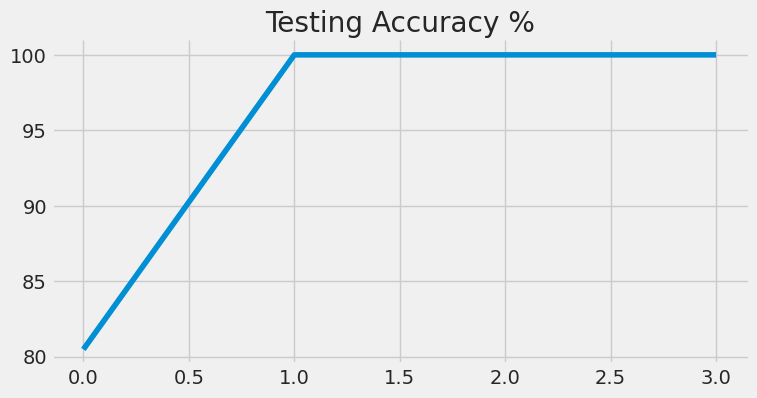

In [283]:
# @title Testing Accuracy %

from matplotlib import pyplot as plt
results_df['Testing Accuracy %'].plot(kind='line', figsize=(8, 4), title='Testing Accuracy %')
plt.gca().spines[['top', 'right']].set_visible(False)

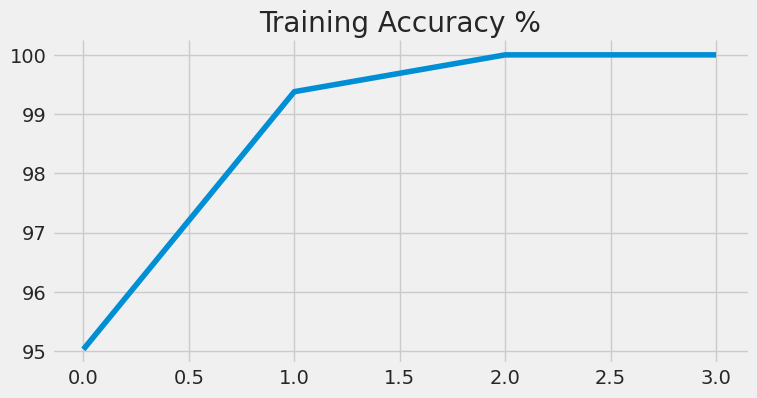

In [284]:
# @title Training Accuracy %

from matplotlib import pyplot as plt
results_df['Training Accuracy %'].plot(kind='line', figsize=(8, 4), title='Training Accuracy %')
plt.gca().spines[['top', 'right']].set_visible(False)